In [175]:
from monte_carlo import MonteCarloPricing
from black_scholes import OptionPrice
from unittest.mock import patch
import numpy as np
import matplotlib.pyplot as plt


# Initial Monte Carlo Pricing
Pricing of European and American Puts and Calls

In [9]:
from monte_carlo import *
mc = MonteCarloPricing(S_0=100, X=100, r=0.05, sigma=0.2, T=1.0, num_paths=100000, steps=252, seed=10)

price_e, stderr_e = mc.european(call=True, antithetic=True)
print(f"EU Call Price {price_e:.4f} ± {1.96*stderr_e:.4f} (95% CI)")

price_a, stderr_a = mc.american(call=True, antithetic=True, basis_fn="laguerre")
print(f"US Call Price {price_a:.4f} ± {1.96*stderr_a:.4f} (95% CI)")

price_e, stderr_e = mc.european(call=False, antithetic=True)
print(f"EU Put Price {price_e:.4f} ± {1.96*stderr_e:.4f} (95% CI)")

price_a, stderr_a = mc.american(call=False, antithetic=True)
print(f"US Put Price {price_a:.4f} ± {1.96*stderr_a:.4f} (95% CI)")

EU Call Price 10.3868 ± 0.0908 (95% CI)
US Call Price 10.4699 ± 0.0912 (95% CI)
EU Put Price 5.5510 ± 0.0535 (95% CI)
US Put Price 6.0604 ± 0.0435 (95% CI)


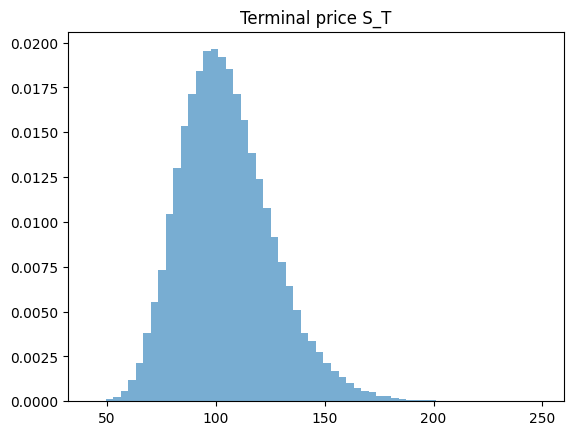

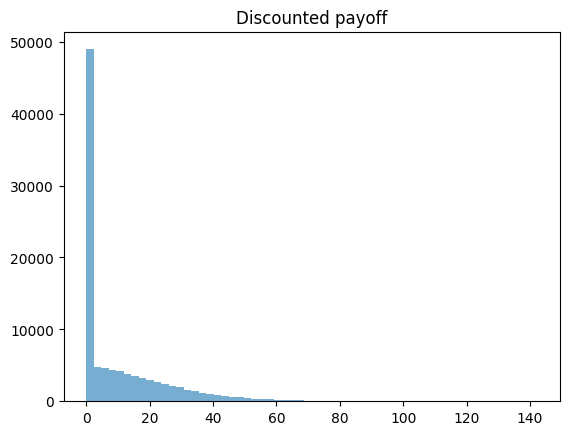

In [10]:
import matplotlib.pyplot as plt, numpy as np
paths = mc.simulate_paths()
S_T = paths[-1]
plt.hist(S_T, bins=60, density=True, alpha=0.6); plt.title("Terminal price S_T"); plt.show()

payoff = np.maximum(S_T - mc.X, 0.0)  # call
disc = np.exp(-mc.r * mc.T) * payoff
plt.hist(disc, bins=60, alpha=0.6); plt.title("Discounted payoff"); plt.show()

Reference American Call Price: 6.0822


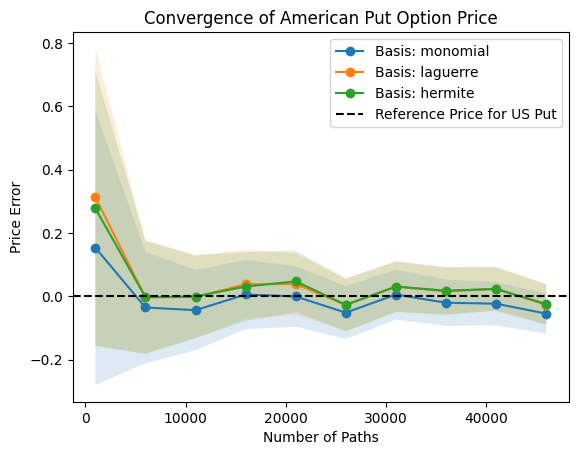

In [ ]:
import numpy as np, matplotlib.pyplot as plt
sizes = np.arange(1000, 51000, 5000)
bases = ['monomial', 'laguerre', 'hermite']
seed = 42
prices, errs = [], []

reference_mc = MonteCarloPricing(100, 100, 0.2, 1.0, r=0.05, num_paths=1_000_000, steps=252, seed=seed)
ref_price, _ = reference_mc.american(call=False, antithetic=True, basis_fn='laguerre')
print(f"Reference American Call Price: {ref_price:.4f}")

plt.figure()
for basis in bases:
    prices = []
    errs = []

    for n in sizes:
        mc_n = MonteCarloPricing(100, 100, 0.2, 1.0, r=0.05, num_paths=n, steps=252, seed=seed)
        p, se = mc_n.american(call=False, antithetic=True, basis_fn=basis)
        prices.append(p)
        errs.append(se)

    prices = np.array(prices)
    errs  = np.array(errs)

    plt.plot(sizes, prices - ref_price, marker='o', label=f'Basis: {basis}')
    plt.fill_between(sizes, prices - ref_price - 1.96 * errs, prices - ref_price + 1.96 * errs, alpha=0.15)

plt.axhline(0.0, color='k', linestyle='--', label='Error = 0')
plt.xlabel('Number of Paths')
plt.ylabel('Price Error')
plt.title('Convergence of American Put Option Price')
plt.legend()
plt.show()

In [15]:
import numpy as np
S = mc._simulate_paths(antithetic=False); S_T = S[-1]
disc_no = np.exp(-mc.r*mc.T) * np.maximum(S_T - mc.X, 0.0)
S = mc._simulate_paths(antithetic=True); S_T = S[-1]
disc_an = np.exp(-mc.r*mc.T) * np.maximum(S_T - mc.X, 0.0)
print("Standard Deviation No Antithetic:", disc_no.std(), "Standard Deviation Antithetic:", disc_an.std())

Standard Deviation No Antithetic: 14.62904902239141 Standard Deviation Antithetic: 14.665979434547237


# Finite Difference Approximation of Sensitivities
Finding the sensitivities using Central Difference Estimate of European Call Option (European for now as American options require further computation)

In [5]:
from mc_finite_difference import EuropeanFiniteDifference, AmericanFiniteDifference

mc = MonteCarloPricing(S_0=100, X=100, r=0.05, sigma=0.2, T=1.0, num_paths=10000, steps=252)
mc_fd = EuropeanFiniteDifference(pricer=mc, call=True, antithetic=True, S0_bump=1e-2, sigma_bump=1e-2, r_bump=1e-3)

price, stderr = mc_fd.price()
print(f"Price {price:.4f} ± {1.96*stderr:.4f} (95% CI)")

delta = mc_fd.delta()
vega = mc_fd.vega()
rho = mc_fd.rho()
print(f"Delta: {delta:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Rho: {rho:.4f}")

TypeError: EuropeanFiniteDifference.__init__() got an unexpected keyword argument 'S0_bump'